# Salary Class Prediction

Logistic Regression Project
UCI Adult Dataset

In [281]:
library(dplyr)
library(ggplot2)
library(Amelia)
library(caTools)

In [282]:
adult = read.csv('adult_sal.csv')

In [283]:
head(adult)

X,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [284]:
adult = select(adult,-X)

In [285]:
str(adult)

'data.frame':	32561 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: Factor w/ 9 levels "?","Federal-gov",..: 8 7 5 5 5 5 5 7 5 5 ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : Factor w/ 16 levels "10th","11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : Factor w/ 7 levels "Divorced","Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation   : Factor w/ 15 levels "?","Adm-clerical",..: 2 5 7 7 11 5 9 5 11 5 ...
 $ relationship : Factor w/ 6 levels "Husband","Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race         : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40

In [286]:
summary(adult)

      age                 type_employer       fnlwgt       
 Min.   :17.00   Private         :22696   Min.   :  12285  
 1st Qu.:28.00   Self-emp-not-inc: 2541   1st Qu.: 117827  
 Median :37.00   Local-gov       : 2093   Median : 178356  
 Mean   :38.58   ?               : 1836   Mean   : 189778  
 3rd Qu.:48.00   State-gov       : 1298   3rd Qu.: 237051  
 Max.   :90.00   Self-emp-inc    : 1116   Max.   :1484705  
                 (Other)         :  981                    
        education     education_num                    marital     
 HS-grad     :10501   Min.   : 1.00   Divorced             : 4443  
 Some-college: 7291   1st Qu.: 9.00   Married-AF-spouse    :   23  
 Bachelors   : 5355   Median :10.00   Married-civ-spouse   :14976  
 Masters     : 1723   Mean   :10.08   Married-spouse-absent:  418  
 Assoc-voc   : 1382   3rd Qu.:12.00   Never-married        :10683  
 11th        : 1175   Max.   :16.00   Separated            : 1025  
 (Other)     : 5134                   Widowe

## Data Cleaning

** Reducing factors for categorical variables. **

### Combine Employer Type

In [287]:
table(adult$type_employer)


               ?      Federal-gov        Local-gov     Never-worked 
            1836              960             2093                7 
         Private     Self-emp-inc Self-emp-not-inc        State-gov 
           22696             1116             2541             1298 
     Without-pay 
              14 

In [288]:
unemp = function(job){
    job = as.character(job)
    if(job == 'Never-worked' | job == 'Without-pay'){
        return ('Unemployed')
    }else 
        return(job)
}

In [289]:
adult$type_employer = sapply(adult$type_employer, unemp)

In [290]:
table(adult$type_employer)


               ?      Federal-gov        Local-gov          Private 
            1836              960             2093            22696 
    Self-emp-inc Self-emp-not-inc        State-gov       Unemployed 
            1116             2541             1298               21 

In [291]:
group_emp <- function(job){
    if (job=='Local-gov' | job=='State-gov'){
        return('SL-gov')
    }else if (job=='Self-emp-inc' | job=='Self-emp-not-inc'){
        return('Self-emp')
    }else{
        return(job)
    }
}

In [292]:
adult$type_employer <- sapply(adult$type_employer,group_emp)

In [293]:
table(adult$type_employer)


          ? Federal-gov     Private    Self-emp      SL-gov  Unemployed 
       1836         960       22696        3657        3391          21 

### Combine Marital Type

In [294]:
table(adult$marital)


             Divorced     Married-AF-spouse    Married-civ-spouse 
                 4443                    23                 14976 
Married-spouse-absent         Never-married             Separated 
                  418                 10683                  1025 
              Widowed 
                  993 

In [295]:
group_marital <- function(mar){
    mar <- as.character(mar)
    
    # Not-Married
    if (mar=='Separated' | mar=='Divorced' | mar=='Widowed'){
        return('Not-Married')
    
    # Never-Married   
    }else if(mar=='Never-married'){
        return(mar)
    
     #Married
    }else{
        return('Married')
    }
}

In [296]:
adult$marital <- sapply(adult$marital,group_marital)
table(adult$marital)


      Married Never-married   Not-Married 
        15417         10683          6461 

### Combine Country by Continent

In [297]:
table(adult$country)


                         ?                   Cambodia 
                       583                         19 
                    Canada                      China 
                       121                         75 
                  Columbia                       Cuba 
                        59                         95 
        Dominican-Republic                    Ecuador 
                        70                         28 
               El-Salvador                    England 
                       106                         90 
                    France                    Germany 
                        29                        137 
                    Greece                  Guatemala 
                        29                         64 
                     Haiti         Holand-Netherlands 
                        44                          1 
                  Honduras                       Hong 
                        13                         20 
         

In [298]:
levels(adult$country)

[1] "?"                          "Cambodia"                  
 [3] "Canada"                     "China"                     
 [5] "Columbia"                   "Cuba"                      
 [7] "Dominican-Republic"         "Ecuador"                   
 [9] "El-Salvador"                "England"                   
[11] "France"                     "Germany"                   
[13] "Greece"                     "Guatemala"                 
[15] "Haiti"                      "Holand-Netherlands"        
[17] "Honduras"                   "Hong"                      
[19] "Hungary"                    "India"                     
[21] "Iran"                       "Ireland"                   
[23] "Italy"                      "Jamaica"                   
[25] "Japan"                      "Laos"                      
[27] "Mexico"                     "Nicaragua"                 
[29] "Outlying-US(Guam-USVI-etc)" "Peru"                      
[31] "Philippines"                "Poland"                    
[33] "Portugal"                   "Puerto-Rico"               
[35] "Scotland"                   "South"                     
[37] "Taiwan"                     "Thailand"                  
[39] "Trinadad&Tobago"            "United-States"             
[41] "Vietnam"                    "Yugoslavia"

In [299]:
Asia <- c('China','Hong','India','Iran','Cambodia','Japan', 'Laos' ,
'Philippines' ,'Vietnam' ,'Taiwan', 'Thailand')

North.America <- c('Canada','United-States','Puerto-Rico' )

Europe <- c('England' ,'France', 'Germany' ,'Greece','Holand-Netherlands','Hungary',
            'Ireland','Italy','Poland','Portugal','Scotland','Yugoslavia')

Latin.and.South.America <- c('Columbia','Cuba','Dominican-Republic','Ecuador',
                             'El-Salvador','Guatemala','Haiti','Honduras',
                             'Mexico','Nicaragua','Outlying-US(Guam-USVI-etc)','Peru',
                            'Jamaica','Trinadad&Tobago')
Other <- c('South')

In [300]:
group_country <- function(ctry){
    if (ctry %in% Asia){
        return('Asia')
    }else if (ctry %in% North.America){
        return('North.America')
    }else if (ctry %in% Europe){
        return('Europe')
    }else if (ctry %in% Latin.and.South.America){
        return('Latin.and.South.America')
    }else{
        return('Other')      
    }
}

In [301]:
adult$country <- sapply(adult$country,group_country)

In [302]:
table(adult$country)


                   Asia                  Europe Latin.and.South.America 
                    671                     521                    1301 
          North.America                   Other 
                  29405                     663 

### Combine Education

In [303]:
table(adult$education)


        10th         11th         12th      1st-4th      5th-6th      7th-8th 
         933         1175          433          168          333          646 
         9th   Assoc-acdm    Assoc-voc    Bachelors    Doctorate      HS-grad 
         514         1067         1382         5355          413        10501 
     Masters    Preschool  Prof-school Some-college 
        1723           51          576         7291 

In [304]:
levels(adult$education)

[1] "10th"         "11th"         "12th"         "1st-4th"      "5th-6th"     
 [6] "7th-8th"      "9th"          "Assoc-acdm"   "Assoc-voc"    "Bachelors"   
[11] "Doctorate"    "HS-grad"      "Masters"      "Preschool"    "Prof-school" 
[16] "Some-college"

In [305]:
Elementary = c('1st-4th')
Middle = c('5th-6th','7th-8th')
High = c('9th','10th','11th','12th','HS-grad')
Collage = c('Assoc-acdm', 'Assoc-voc', 'Prof-school', 'Some-college')

In [306]:
group_education <- function(edu){
    edu = as.character(edu)
    if (edu %in% Elementary){
        return('Elementary')
    }else if (edu %in% Middle){
        return('Middle School')
    }else if (edu %in% High){
        return('High School')
    }else if (edu %in% Collage){
        return('Collage')
    }else{
        return(edu)      
    }
}

In [307]:
adult$education <- sapply(adult$education,group_education)

In [308]:
table(adult$education)


    Bachelors       Collage     Doctorate    Elementary   High School 
         5355         10316           413           168         13556 
      Masters Middle School     Preschool 
         1723           979            51 

### Combine Occupation

In [309]:
table(adult$occupation)


                ?      Adm-clerical      Armed-Forces      Craft-repair 
             1843              3770                 9              4099 
  Exec-managerial   Farming-fishing Handlers-cleaners Machine-op-inspct 
             4066               994              1370              2002 
    Other-service   Priv-house-serv    Prof-specialty   Protective-serv 
             3295               149              4140               649 
            Sales      Tech-support  Transport-moving 
             3650               928              1597 

In [310]:
Non.tech.Service = c('Craft-repair', 'Handlers-cleaners', 'Other-service', 'Priv-house-serv', 'Protective-serv', 'Transport-moving')
Tech.Service = c('Machine-op-inspct', 'Prof-specialty', 'Tech-support')

In [311]:
group_occupation <- function(occ){
    occ = as.character(occ)
    if (occ %in% Non.tech.Service){
        return('Non-technical Service')
    }else if (occ %in% Tech.Service){
        return('Technical Service')
    }else{
        return(occ)      
    }
}

In [312]:
adult$occupation <- sapply(adult$occupation,group_occupation)

In [313]:
table(adult$occupation)


                    ?          Adm-clerical          Armed-Forces 
                 1843                  3770                     9 
      Exec-managerial       Farming-fishing Non-technical Service 
                 4066                   994                 11159 
                Sales     Technical Service 
                 3650                  7070 

In [314]:
str(adult)

'data.frame':	32561 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: chr  "SL-gov" "Self-emp" "Private" "Private" ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : chr  "Bachelors" "Bachelors" "High School" "High School" ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : chr  "Never-married" "Married" "Not-Married" "Married" ...
 $ occupation   : chr  "Adm-clerical" "Exec-managerial" "Non-technical Service" "Non-technical Service" ...
 $ relationship : Factor w/ 6 levels "Husband","Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race         : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40 16 45 50 40 ...
 $ cou

In [315]:
adult$type_employer <- sapply(adult$type_employer,factor)
adult$country <- sapply(adult$country,factor)
adult$marital <- sapply(adult$marital,factor)
adult$education <- sapply(adult$education,factor)
adult$occupation <- sapply(adult$occupation,factor)

In [316]:
str(adult)

'data.frame':	32561 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: Factor w/ 6 levels "SL-gov","Self-emp",..: 1 2 3 3 3 3 3 2 3 3 ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : Factor w/ 8 levels "Bachelors","High School",..: 1 1 2 2 1 3 2 2 3 1 ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : Factor w/ 3 levels "Never-married",..: 1 2 3 2 2 2 2 2 1 2 ...
 $ occupation   : Factor w/ 8 levels "Adm-clerical",..: 1 2 3 3 4 2 3 2 4 2 ...
 $ relationship : Factor w/ 6 levels "Husband","Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race         : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40 16 45 50 40 ...


## Missing Data

In [317]:
adult[adult == '?'] <- NA

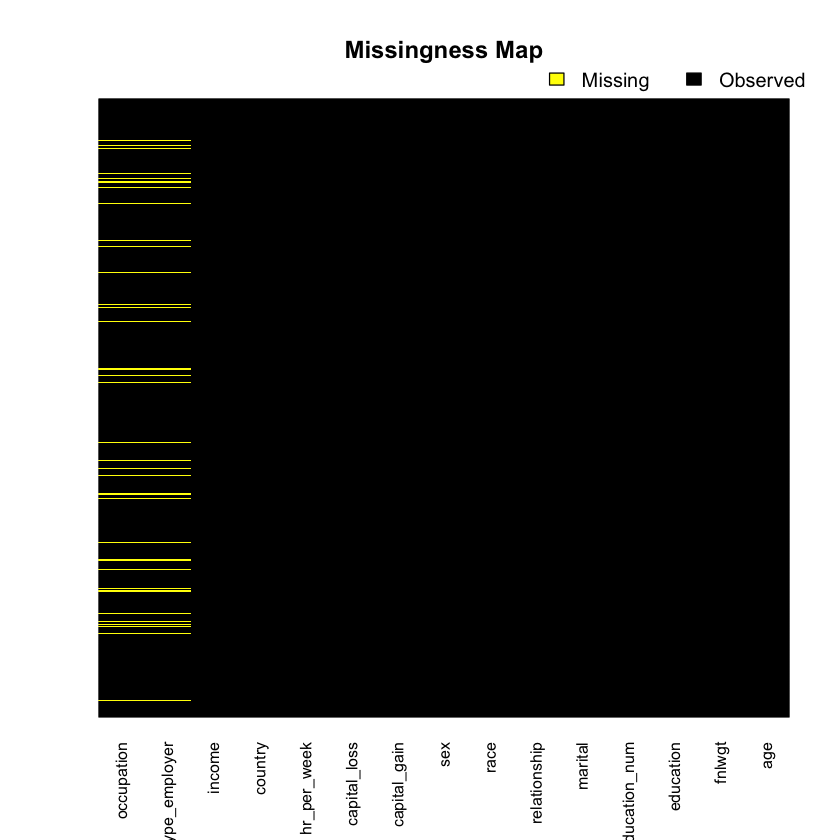

In [318]:
missmap(adult, y.at = c(1), y.labels = c(''), col=c("yellow", "black"))

** Drop missing data **

In [319]:
adult = na.omit(adult)

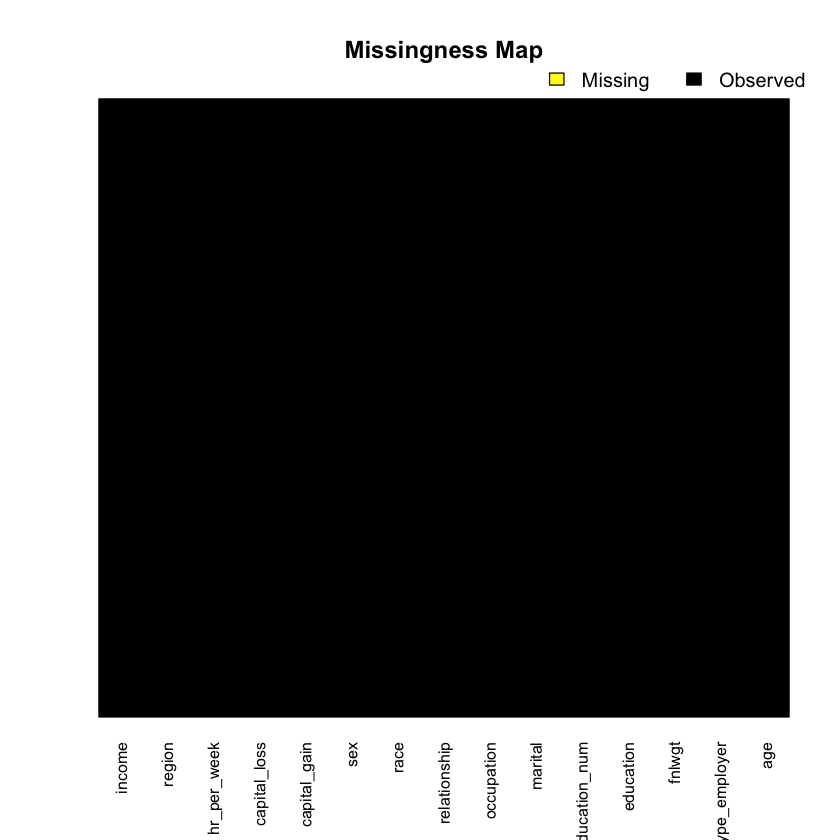

In [338]:
missmap(adult, y.at = c(1), y.labels = c(''), col=c("yellow", "black"))

## EDA

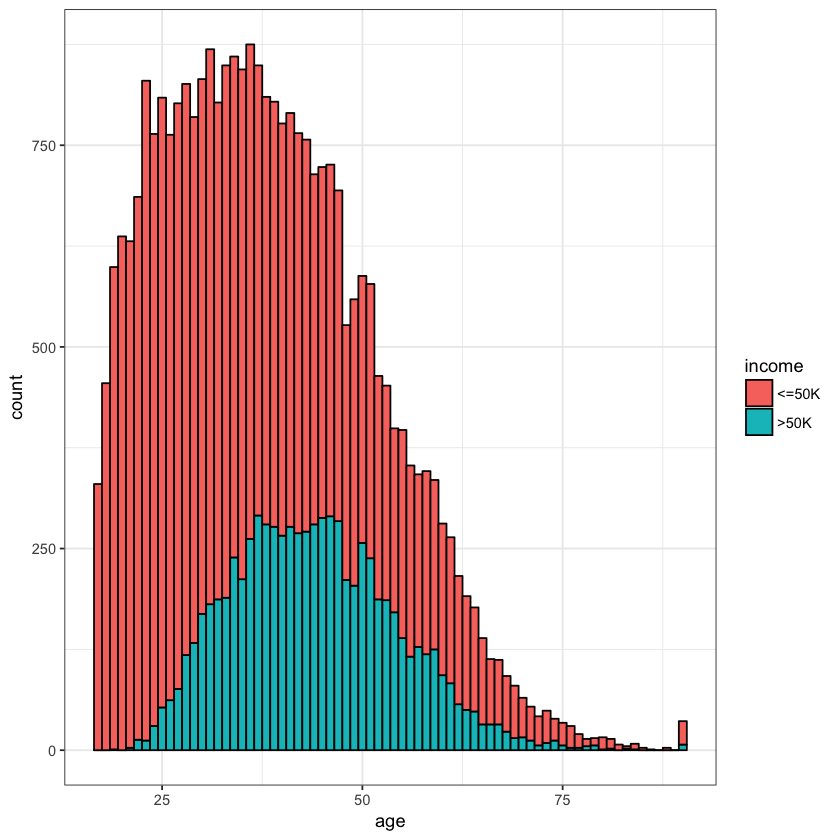

In [320]:
ggplot(adult, aes(age)) +
    geom_histogram(aes(fill = income), color = 'black', binwidth = 1) +
    theme_bw()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


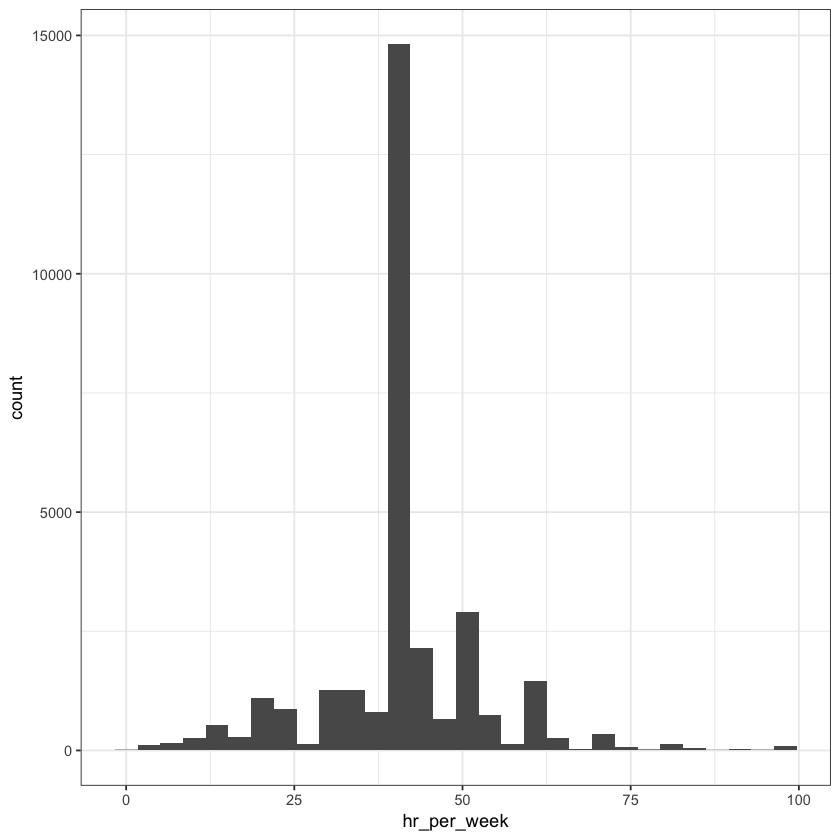

In [321]:
ggplot(adult, aes(hr_per_week)) +
    geom_histogram() +
    theme_bw()

In [322]:
# names(adult)[names(adult)=="country"] <- "region"
adult = rename(adult, region = country)

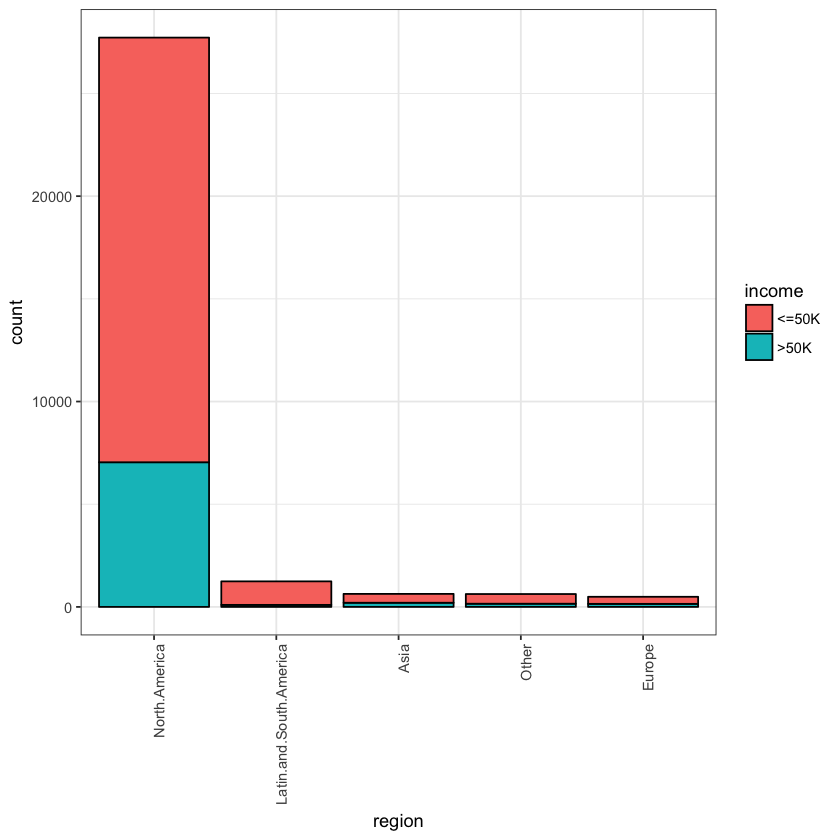

In [339]:
ggplot(adult, aes(region)) +
    geom_bar(aes(fill = income), color = 'black') +
    theme_bw() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))


## Logistic Regression Model

In [324]:
str(adult)

'data.frame':	30718 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: Factor w/ 6 levels "SL-gov","Self-emp",..: 1 2 3 3 3 3 3 2 3 3 ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : Factor w/ 8 levels "Bachelors","High School",..: 1 1 2 2 1 3 2 2 3 1 ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : Factor w/ 3 levels "Never-married",..: 1 2 3 2 2 2 2 2 1 2 ...
 $ occupation   : Factor w/ 8 levels "Adm-clerical",..: 1 2 3 3 4 2 3 2 4 2 ...
 $ relationship : Factor w/ 6 levels "Husband","Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race         : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40 16 45 50 40 ...


### Train Test Split

In [325]:
set.seed(101)

In [326]:
sample = sample.split(adult$income, SplitRatio = 0.7)
train = subset(adult, sample == T)
test = subset(adult, sample == F)

### Train the model

In [327]:
model = glm(income ~ . , family = binomial(link = 'logit'), data = train)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [328]:
summary(model)


Call:
glm(formula = income ~ ., family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.1398  -0.5293  -0.2064   0.0000   3.5986  

Coefficients:
                                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     -8.910e+00  4.882e-01 -18.250  < 2e-16 ***
age                              2.589e-02  1.983e-03  13.057  < 2e-16 ***
type_employerSelf-emp           -1.046e-01  8.615e-02  -1.214 0.224754    
type_employerPrivate             7.655e-02  6.834e-02   1.120 0.262663    
type_employerFederal-gov         5.953e-01  1.245e-01   4.783 1.72e-06 ***
type_employerUnemployed         -1.382e+01  3.633e+02  -0.038 0.969654    
fnlwgt                           5.835e-07  2.072e-07   2.817 0.004854 ** 
educationHigh School            -1.552e-01  1.162e-01  -1.336 0.181701    
educationMasters                 6.558e-02  9.424e-02   0.696 0.486491    
educationCollage                -3

In [329]:
# delete variables that are not significantly add to the fit 
new.step.model = step(model)

Start:  AIC=14266.04
income ~ age + type_employer + fnlwgt + education + education_num + 
    marital + occupation + relationship + race + sex + capital_gain + 
    capital_loss + hr_per_week + region



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                Df Deviance   AIC
<none>                14186 14266
- education      7    14204 14270
- fnlwgt         1    14194 14272
- race           4    14206 14278
- region         4    14213 14285
- type_employer  4    14224 14296
- marital        2    14240 14316
- sex            1    14285 14363
- education_num  1    14342 14420
- age            1    14358 14436
- capital_loss   1    14405 14483
- hr_per_week    1    14424 14502
- relationship   5    14465 14535
- occupation     6    14473 14541
- capital_gain   1    15457 15535


In [330]:
summary(new.step.model)


Call:
glm(formula = income ~ age + type_employer + fnlwgt + education + 
    education_num + marital + occupation + relationship + race + 
    sex + capital_gain + capital_loss + hr_per_week + region, 
    family = binomial(link = "logit"), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.1398  -0.5293  -0.2064   0.0000   3.5986  

Coefficients:
                                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     -8.910e+00  4.882e-01 -18.250  < 2e-16 ***
age                              2.589e-02  1.983e-03  13.057  < 2e-16 ***
type_employerSelf-emp           -1.046e-01  8.615e-02  -1.214 0.224754    
type_employerPrivate             7.655e-02  6.834e-02   1.120 0.262663    
type_employerFederal-gov         5.953e-01  1.245e-01   4.783 1.72e-06 ***
type_employerUnemployed         -1.382e+01  3.633e+02  -0.038 0.969654    
fnlwgt                           5.835e-07  2.072e-07   2.817 0.004854 ** 
educationHigh S

### Test the model

In [331]:
test$predicted.income = predict(new.step.model, newdata = test, type = 'response')

** create confusion matrix **

In [341]:
table(test$income, test$predicted.income > 0.5)

       
        FALSE TRUE
  <=50K  6398  522
  >50K    892 1403

In [333]:
# accuracy
(6398+1403)/(6398+1403+522+892)

[1] 0.8465545

In [334]:
# recall
6398/(6398+522)

[1] 0.9245665

In [335]:
# precision 
6398/(6398+892)

[1] 0.8776406